# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [3]:
def max_element(arr):
    max_val = None
    is_zero_before = False
    
    for elem in arr:
        if is_zero_before and (max_val is None or elem > max_val):
            max_val = elem
        
        is_zero_before = (elem == 0)
    
    return max_val

arr = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
result = max_element(arr)
print(result) 

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [6]:
def nearest_value(matrix, number):
    flat_matrix = matrix.flatten()  # Flatten the matrix to a 1D array
    closest_element = min(flat_matrix, key=lambda x: abs(x - number))
    return closest_element

X = np.arange(0, 10).reshape((2, 5))
v = 3.6
result = nearest_value(X, v)
print(result) 

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [7]:
def scale(X):
    # Calculate the mean and standard deviation of each column
    column_means = np.mean(X, axis=0)
    column_stds = np.std(X, axis=0)
    
    # Replace standard deviations of zero with 1 to avoid division by zero
    column_stds[column_stds == 0] = 1
    
    # Scale each column
    scaled_X = (X - column_means) / column_stds
    
    return scaled_X

# Generate a random matrix for testing
random_matrix = np.random.randint(1, 10, (3, 4))

# Test the scale function
scaled_matrix = scale(random_matrix)
print("Original Matrix:")
print(random_matrix)
print("Scaled Matrix:")
print(scaled_matrix)

Original Matrix:
[[2 8 5 4]
 [5 6 8 9]
 [7 5 4 7]]
Scaled Matrix:
[[-1.29777137  1.33630621 -0.39223227 -1.29777137]
 [ 0.16222142 -0.26726124  1.37281295  1.13554995]
 [ 1.13554995 -1.06904497 -0.98058068  0.16222142]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [9]:
def get_stats(matrix):
     # Determinant
    det = np.linalg.det(matrix)

    # Trace
    trace = np.trace(matrix)

    # Minimum and Maximum elements
    min_elem = np.min(matrix)
    max_elem = np.max(matrix)

    # Frobenius Norm
    frobenius_norm = np.linalg.norm(matrix, 'fro')

    # Eigenvalues
    eigenvalues = np.linalg.eigvals(matrix)

    # Inverse Matrix
    try:
        inverse_matrix = np.linalg.inv(matrix)
    except np.linalg.LinAlgError:
        inverse_matrix = None

    return {
        "Determinant": det,
        "Trace": trace,
        "Minimum Element": min_elem,
        "Maximum Element": max_elem,
        "Frobenius Norm": frobenius_norm,
        "Eigenvalues": eigenvalues,
        "Inverse Matrix": inverse_matrix
    }

# Generate a matrix with elements from a normal distribution with mean 10 and std deviation 1
mean = 10
std_dev = 1
random_matrix = np.random.normal(mean, std_dev, (3, 3))

# Calculate matrix properties
properties = get_stats(random_matrix)

# Print the results
for prop, value in properties.items():
    print(f"{prop}:")
    print(value)

Determinant:
11.114083777967892
Trace:
28.404241091479694
Minimum Element:
8.020932189970368
Maximum Element:
10.930520374047708
Frobenius Norm:
28.79898353544207
Eigenvalues:
[28.68733821+0.j         -0.14154856+0.60612312j -0.14154856-0.60612312j]
Inverse Matrix:
[[ 0.53800207 -0.68127695  0.27885247]
 [ 2.44757185 -1.51849017 -0.51429164]
 [-2.97775705  2.24365103  0.28462493]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [11]:
max_elements = []
for exp_num in range(100):
    # Generate two 10x10 matrices with elements from standard normal distribution
    matrix1 = np.random.normal(0, 1, (10, 10))
    matrix2 = np.random.normal(0, 1, (10, 10))
    
    # Multiply the matrices
    result_matrix = np.dot(matrix1, matrix2)
    
    # Find the maximum element in the result matrix
    max_element = np.max(result_matrix)
    
    # Store the maximum element in the list
    max_elements.append(max_element)

# Calculate the mean and 95th percentile of the maximum elements
mean_max_element = np.mean(max_elements)
percentile_95 = np.percentile(max_elements, 95)

print(f"Mean of maximum elements: {mean_max_element}")
print(f"95th percentile of maximum elements: {percentile_95}")

Mean of maximum elements: 8.426303758747236
95th percentile of maximum elements: 11.81853182527403


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [1]:
import pandas as pd
%matplotlib inline

In [12]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [13]:
# Count the occurrences of each cancellation code and store them in a dictionary
cancellation_counts = df['CancellationCode'].value_counts().to_dict()

# Find the cancellation code with the highest count
most_common_cancellation = max(cancellation_counts, key=cancellation_counts.get)

most_common_cancellation

'A'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [6]:
# Calculate the mean, minimum, and maximum distance
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()

# Print the results
print(f"Mean Distance Traveled: {mean_distance}")
print(f"Minimum Distance Traveled: {min_distance}")
print(f"Maximum Distance Traveled: {max_distance}")

Mean Distance Traveled: 724.5082571428571
Minimum Distance Traveled: 31
Maximum Distance Traveled: 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [7]:
# Find the minimum distance and its corresponding rows
min_distance = df['Distance'].min()
min_distance_rows = df[df['Distance'] == min_distance]

# Print the details of flights with the minimum distance
print(f"Suspiciously Low Minimum Distance: {min_distance}")
print("Flights with Minimum Distance:")
print(min_distance_rows[['Year', 'Month', 'DayofMonth', 'FlightNum']])

# Check the distances for the same flights on other days
other_distances = df[(df['FlightNum'].isin(min_distance_rows['FlightNum'])) & (df['Distance'] != min_distance)]
print("Distances for the Same Flights on Other Days:")
print(other_distances[['Year', 'Month', 'DayofMonth', 'FlightNum', 'Distance']])

Suspiciously Low Minimum Distance: 31
Flights with Minimum Distance:
       Year  Month  DayofMonth  FlightNum
1116   2008     12          30         65
6958   2008     12          26         65
17349  2008      8          18         64
27534  2008      3          11         64
46082  2008      8           9         65
48112  2008      2          28         64
Distances for the Same Flights on Other Days:
       Year  Month  DayofMonth  FlightNum  Distance
501    2008      3          20         64       533
1389   2008      3          13         64       680
1517   2008      7          10         65       680
2619   2008      5          23         64      2381
3869   2008      7           1         64        82
...     ...    ...         ...        ...       ...
66529  2008     12          21         65        82
67172  2008      3          22         64       533
68264  2008      9           7         65       386
68338  2008      8           3         65      2454
69305  2008      1 

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [9]:
# Count the occurrences of each departure airport code
departure_counts = df['Origin'].value_counts()

# Find the airport with the most departures
most_common_airport_code = departure_counts.idxmax()
most_common_airport_count = departure_counts.max()

# Print the airport code and the number of departures
print(f"The airport with the most departures is {most_common_airport_code} with {most_common_airport_count} departures.")

The airport with the most departures is ATL with 4134 departures.


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [10]:
# Group the data by departure airport (Origin) and calculate the mean AirTime for each group
average_airtime_by_airport = df.groupby('Origin')['AirTime'].mean()

# Find the airport with the highest average AirTime
airport_with_highest_avg_airtime = average_airtime_by_airport.idxmax()
highest_avg_airtime = average_airtime_by_airport.max()

# Print the airport code and its average AirTime
print(f"The airport with the highest average AirTime is {airport_with_highest_avg_airtime} with an average AirTime of {highest_avg_airtime} minutes.")

The airport with the highest average AirTime is SJU with an average AirTime of 205.2 minutes.


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [11]:
# Group the data by departure airport (Origin) and calculate counts
airport_counts = df.groupby('Origin').size().reset_index(name='TotalFlights')
delayed_counts = df[df['DepDelay'] > 0].groupby('Origin').size().reset_index(name='DelayedFlights')

# Merge the counts
merged_data = pd.merge(airport_counts, delayed_counts, on='Origin', how='inner')

# Calculate the proportion of delayed flights
merged_data['DelayedProportion'] = merged_data['DelayedFlights'] / merged_data['TotalFlights']

# Exclude airports with fewer than 1000 flights
filtered_data = merged_data[merged_data['TotalFlights'] >= 1000]

# Find the airport with the highest proportion of delayed flights
airport_with_highest_delayed_proportion = filtered_data['Origin'][filtered_data['DelayedProportion'].idxmax()]
highest_delayed_proportion = filtered_data['DelayedProportion'].max()

# Print the airport code and its proportion of delayed flights
print(f"The airport with the highest proportion of delayed flights (with at least 1000 flights) is {airport_with_highest_delayed_proportion} with a proportion of {highest_delayed_proportion:.2%}.")

The airport with the highest proportion of delayed flights (with at least 1000 flights) is EWR with a proportion of 51.12%.


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [20]:
df = pd.read_csv('2008.csv')

# Check for missing values
missing_values = df.isnull().sum().sum()

# Check how many objects have at least one missing value
objects_with_missing = df.shape[0] - df.dropna().shape[0]

# Check how many features have at least one missing value
features_with_missing = df.shape[1] - df.dropna(axis=1).shape[1]

# Print the results
print("1. Are there missing values in the data?")
if missing_values > 0:
    print("   Yes, there are missing values in the data.")
else:
    print("   No, there are no missing values in the data.")

print("2. How many total missing elements are there in the 'object-feature' table?")
print(f"   There are {missing_values} missing elements in the table.")

print("3. How many objects have at least one missing value?")
print(f"   {objects_with_missing} objects have at least one missing value.")

print("4. How many features have at least one missing value?")
print(f"   {features_with_missing} features have at least one missing value.")

1. Are there missing values in the data?
   Yes, there are missing values in the data.
2. How many total missing elements are there in the 'object-feature' table?
   There are 355215 missing elements in the table.
3. How many objects have at least one missing value?
   70000 objects have at least one missing value.
4. How many features have at least one missing value?
   16 features have at least one missing value.


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [21]:
# Check for missing values in the target variable (DepDelay)
missing_target = df['DepDelay'].isnull().sum()

# Analyze objects with missing values in the target variable
objects_with_missing_target = df[df['DepDelay'].isnull()]

# Determine the reasons and commonalities for missing values in the target variable
# You can analyze the objects_with_missing_target DataFrame to understand the reasons

# Decide if any features should be excluded based on your analysis
# If there are specific features that consistently have missing values for objects with missing target values,
# you may consider excluding those features

# Exclude objects with missing target values and target values equal to 0
df = df.dropna(subset=['DepDelay']).loc[df['DepDelay'] != 0]

# Separate the target variable (DepDelay) into a separate vector
target = df['DepDelay']

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [22]:
# Define a list of time-related features to be transformed
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

# Loop through each time-related feature and create new Hour and Minute features
for feature in time_features:
    # Create new feature names for Hour and Minute
    hour_feature = feature + '_Hour'
    minute_feature = feature + '_Minute'
    
    # Extract Hour and Minute components while handling missing values
    df[hour_feature] = df[feature] // 100
    df[minute_feature] = df[feature] % 100
    
    # Handle missing values in the new features
    df.loc[df[feature].isnull(), [hour_feature, minute_feature]] = None
    
    # Drop the original time-related feature
    df = df.drop(columns=[feature])

# Print the first few rows of the updated DataFrame
print(df.head())

   Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0  2008      6          18          3            WN        242  N699SW   
1  2008      6           4          3            XE       2380  N15980   
2  2008      8           3          7            WN       1769  N464WN   
3  2008      1          23          3            OO       3802  N465SW   
4  2008      5           4          7            WN        399  N489WN   

   ActualElapsedTime  CRSElapsedTime  AirTime  ...  SecurityDelay  \
0               57.0            65.0     46.0  ...            NaN   
1              124.0           138.0    108.0  ...            NaN   
2              138.0           155.0    125.0  ...            NaN   
3              102.0           111.0     79.0  ...            NaN   
4              148.0           160.0    136.0  ...            NaN   

   LateAircraftDelay DepTime_Hour DepTime_Minute  CRSDepTime_Hour  \
0                NaN         21.0           11.0             20.0   
1 

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [23]:
# Exclude 'TailNum' and 'Year' features
df = df.drop(columns=['TailNum', 'Year'])

# Calculate correlation coefficients between numerical features and the target (DepDelay)
correlations = df.corr()['DepDelay'].abs().sort_values(ascending=False)

# Define a threshold for correlation significance
correlation_threshold = 0.1  # Adjust this threshold as needed

# Exclude features with high correlation to the target variable
features_to_exclude = correlations[correlations >= correlation_threshold].index.tolist()
df = df.drop(columns=features_to_exclude)

# Print the list of excluded features
print("Excluded Features with High Correlation to DepDelay:")
print(features_to_exclude)

# Print the first few rows of the updated DataFrame
print(df.head())

Excluded Features with High Correlation to DepDelay:
['DepDelay', 'ArrDelay', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay', 'DepTime_Hour', 'NASDelay', 'CRSDepTime_Hour', 'CRSArrTime_Hour', 'TaxiOut']
   Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  ActualElapsedTime  \
0      6          18          3            WN        242               57.0   
1      6           4          3            XE       2380              124.0   
2      8           3          7            WN       1769              138.0   
3      1          23          3            OO       3802              102.0   
4      5           4          7            WN        399              148.0   

   CRSElapsedTime  AirTime Origin Dest  ...  TaxiIn  Cancelled  \
0            65.0     46.0    MDW  CLE  ...     3.0          0   
1           138.0    108.0    IAH  AVL  ...     4.0          0   
2           155.0    125.0    MDW  TPA  ...     4.0          0   
3           111.0     79.0    SLC  FCA  ...     4.0  

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
# Read the dataset from the CSV file
df = pd.read_csv('2008.csv')

# Drop 'TailNum' and 'Year' features as they are not needed
df = df.drop(columns=['TailNum', 'Year'])

# Define numerical and categorical features
numerical_features = ['DepTime', 'TaxiIn', 'ArrTime', 'FlightNum']
categorical_features = ['UniqueCarrier', 'Origin', 'Dest']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize the features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data using the preprocessor
X = preprocessor.fit_transform(df.drop(columns=['DepDelay']))
y = df['DepDelay']

# Print the first few rows of the transformed features (X) and target (y)
print("Transformed Features (X):")
print(X[:5])
print("\nTarget (y):")
print(y[:5])

Transformed Features (X):
  (0, 0)	1.6520829999285114
  (0, 1)	-0.7923178990574516
  (0, 2)	1.6607930587514452
  (0, 3)	-1.0046647230170445
  (0, 21)	1.0
  (0, 201)	1.0
  (0, 381)	1.0
  (1, 0)	0.2014669164044656
  (1, 1)	-0.5853576104815179
  (1, 2)	0.5024281523674128
  (1, 3)	0.08415589578035061
  (1, 22)	1.0
  (1, 158)	1.0
  (1, 341)	1.0
  (2, 0)	-0.3978387064237168
  (2, 1)	-0.5853576104815179
  (2, 2)	0.04349119118757982
  (2, 3)	-0.22700846253826887
  (2, 21)	1.0
  (2, 201)	1.0
  (2, 603)	1.0
  (3, 0)	-0.40207408185006444
  (3, 1)	-0.5853576104815179
  (3, 2)	-0.31323710178189734
  (3, 3)	0.808338739526794
  (3, 18)	1.0
  (3, 287)	1.0
  (3, 422)	1.0
  (4, 0)	-1.0924402763447199
  (4, 1)	-0.5853576104815179
  (4, 2)	-0.4735644244648084
  (4, 3)	-0.924709233236319
  (4, 21)	1.0
  (4, 177)	1.0
  (4, 340)	1.0

Target (y):
0    16.0
1    16.0
2    -2.0
3    -3.0
4    -5.0
Name: DepDelay, dtype: float64


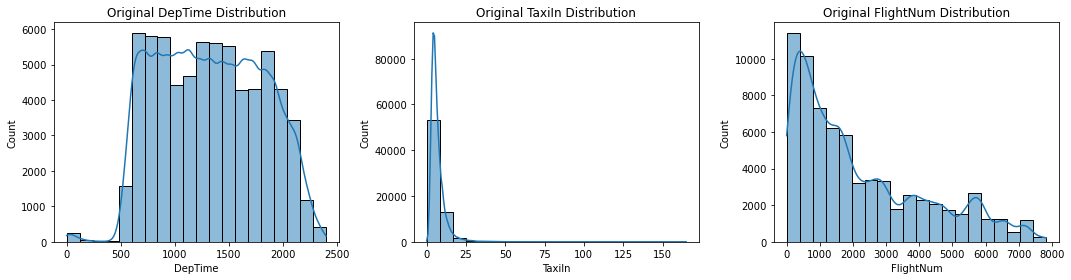

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Select three numerical features for visualization
numerical_features = ['DepTime', 'TaxiIn', 'FlightNum']

# Plot histograms of the original data
plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Original {feature} Distribution')

plt.tight_layout()
plt.show()

In [ ]:
X['DepTime_Hour'].hist(bins=20)

In [ ]:
X['TaxiIn'].hist(bins=20)

In [ ]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

In [31]:
df = pd.read_csv('2008.csv')

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_data(df):
    # Step 1: Replace missing values with zeros for numerical features
    numerical_features = df.select_dtypes(include=['float64', 'int64'])
    df[numerical_features.columns] = numerical_features.fillna(0)

    # Replace missing values with 'nan' for categorical features
    categorical_features = df.select_dtypes(include=['object'])
    df[categorical_features.columns] = categorical_features.fillna('nan')

    # Step 2: Scale numerical features using StandardScaler
    scaler = StandardScaler()
    df[numerical_features.columns] = scaler.fit_transform(df[numerical_features.columns])

    # Step 3: One-hot encode categorical features
    df = pd.get_dummies(df, columns=categorical_features.columns)

    return df

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [32]:
transformed_df = transform_data(df)

# Count the number of features (columns) in the transformed_data DataFrame
num_features = transformed_df.shape[1]

# Print the number of features
print("Number of features after transformation:", num_features)

Number of features after transformation: 5765


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [34]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(transformed_df, df['DepDelay'], test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select 1000 samples from the training set
X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train_subset, y_train_subset)

# Make predictions on the training subset
y_train_subset_pred = lr.predict(X_train_subset)

# Evaluate on the training subset
mse_train_subset = mean_squared_error(y_train_subset, y_train_subset_pred)
r2_train_subset = r2_score(y_train_subset, y_train_subset_pred)

# Make predictions on the test set
y_test_pred = lr.predict(X_test)

# Evaluate on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f'MSE on the training subset: {mse_train_subset:.2f}')
print(f'R-squared on the training subset: {r2_train_subset:.2f}')
print(f'MSE on the test set: {mse_test:.2f}')
print(f'R-squared on the test set: {r2_test:.2f}')

MSE on the training subset: 0.00
R-squared on the training subset: 1.00
MSE on the test set: 0.00
R-squared on the test set: 1.00


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(transformed_df, df['DepDelay'], test_size=0.3, random_state=42)

# range of alpha values to test
alpha_values = [0.01, 0.1, 1.0, 10.0]

# Ridge regression model
ridge = Ridge()

# Perform grid search to find the best alpha value
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Train Ridge regression model with the best alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = ridge.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'MSE on validation set: {mse_val:.2f}')

MSE on validation set: 0.00


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

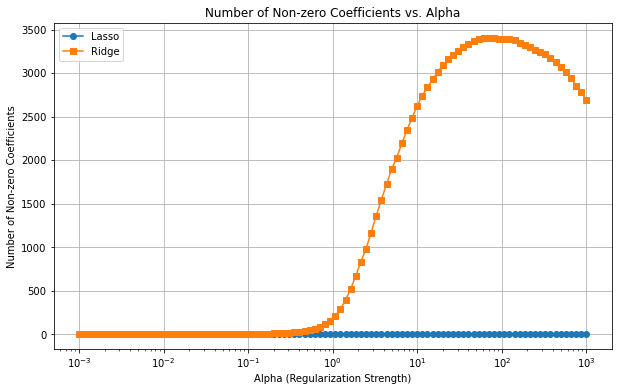

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

# Define a range of alpha values in a logarithmic scale
alphas = np.logspace(-3, 3, 100)

# Initialize lists to store the number of non-zero coefficients for Lasso and Ridge
lasso_non_zero_coeffs = []
ridge_non_zero_coeffs = []

# Iterate through alpha values and count non-zero coefficients for each model
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    num_non_zero_coeffs_lasso = np.sum(np.abs(lasso.coef_) > 1e-4)
    lasso_non_zero_coeffs.append(num_non_zero_coeffs_lasso)
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    num_non_zero_coeffs_ridge = np.sum(np.abs(ridge.coef_) > 1e-4)
    ridge_non_zero_coeffs.append(num_non_zero_coeffs_ridge)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, lasso_non_zero_coeffs, label='Lasso', marker='o')
plt.semilogx(alphas, ridge_non_zero_coeffs, label='Ridge', marker='s')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Number of Non-zero Coefficients')
plt.title('Number of Non-zero Coefficients vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

RMSE: 0.05
MAE: 0.03
R2: 1.00


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Fitting 5 folds for each of 100 candidates, totalling 500 fits


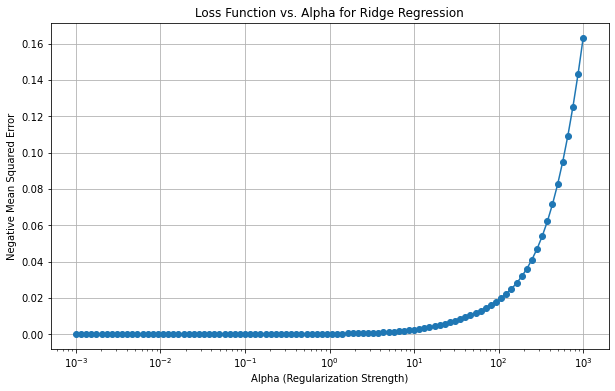

Optimal Alpha: 0.0010
RMSE: 0.00
MAE: 0.00
R2: 1.00


In [42]:
from sklearn.model_selection import GridSearchCV, KFold

# Define a range of alpha values in a logarithmic scale
alphas = np.logspace(-3, 3, 100)

# Create Ridge regression model
ridge = Ridge()

# Create a parameter grid with alpha values
param_grid = {'alpha': alphas}

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV model on the training data
grid_search.fit(X_train[:1000], y_train[:1000])  # Using 1000 objects as specified

# Get the best alpha from GridSearchCV
best_alpha = grid_search.best_params_['alpha']

# Plot the loss function (negative mean squared error) against alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, -grid_search.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Negative Mean Squared Error')
plt.title('Loss Function vs. Alpha for Ridge Regression')
plt.grid(True)
plt.show()

# Re-train Ridge regression with the optimal alpha on the entire training data
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Optimal Alpha: {best_alpha:.4f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

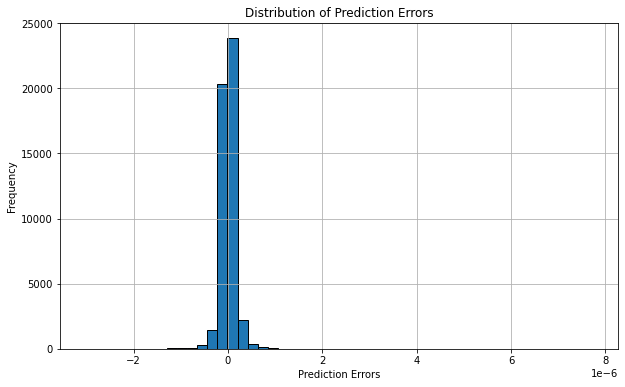

In [43]:
from sklearn.model_selection import cross_val_predict


# Perform cross-validated predictions on the training data
y_train_pred = cross_val_predict(ridge, X_train, y_train, cv=5)

# Calculate the errors
errors = y_train - y_train_pred

# Plot the distribution of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel('Prediction Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()